In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
file_names=[('Sales_April_2019.csv'),
('Sales_March_2019.csv'),
('Sales_May_2019.csv'),
('Sales_June_2019.csv'),
('Sales_July_2019.csv'),
('Sales_August_2019.csv'),
('Sales_September_2019.csv'),
('Sales_November_2019.csv'),
('Sales_December_2019.csv')]
df = pd.concat([pd.read_csv(file) for file in file_names], ignore_index=True)



###Checking the top values

In [171]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


###Make column month and .str

In [172]:
df['Month'] = df['Order Date'].str[0:2]

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144712 entries, 0 to 144711
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          144287 non-null  object
 1   Product           144287 non-null  object
 2   Quantity Ordered  144287 non-null  object
 3   Price Each        144287 non-null  object
 4   Order Date        144287 non-null  object
 5   Purchase Address  144287 non-null  object
 6   Month             144287 non-null  object
dtypes: object(7)
memory usage: 7.7+ MB


**Count total values in whole data**

In [174]:
print(df.count())



Order ID            144287
Product             144287
Quantity Ordered    144287
Price Each          144287
Order Date          144287
Purchase Address    144287
Month               144287
dtype: int64


**resolve issue of convert into numeric**
**Remove the non value**

* Convert the data in int,float **errors=coerce helps to remove string
from value** *eg data={1,2,'h'} errors occouced cannt convert due to a string value in int data so for make string null value error='coerce' helps to make null valu*






























In [175]:
df['Month'] = pd.to_numeric(df['Month'], errors='coerce')
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')


**remove nan value from row and column of month**

In [176]:
# Remove rows where 'Month' column has NaN values
df.dropna(subset=['Month','Quantity Ordered','Price Each','Purchase Address',], inplace=True)

**convert month into int**

In [177]:
df['Month']=df['Month'].astype('int32')
df['Quantity Ordered']=df['Quantity Ordered'].astype('int32')



**Check is it convert into int**

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143999 entries, 0 to 144711
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          143999 non-null  object 
 1   Product           143999 non-null  object 
 2   Quantity Ordered  143999 non-null  int32  
 3   Price Each        143999 non-null  float64
 4   Order Date        143999 non-null  object 
 5   Purchase Address  143999 non-null  object 
 6   Month             143999 non-null  int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 7.7+ MB


###drop nan values

In [179]:
df=df.dropna()

**check top10 values**

In [180]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4


###Make column for city and get it from address

1.  .str[1]: This selects the second element (index 1) from each list. In the context of an address like “917 1st St, Dallas, TX 75001”, the second element is " Dallas".

2.###.str.strip(): This removes any leading or trailing whitespace from the selected city name. So " Dallas" becomes “Dallas”.





In [181]:
df['City'] = df['Purchase Address'].str.split(',').str[1].str.strip()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


#delete unusally data or column

In [182]:
df.pop('Order ID')


,Order ID
0,176558
2,176559
3,176560
4,176560
5,176561
...,...
144707,319666
144708,319667
144709,319668
144710,319669


In [183]:
df.pop('Order Date')


,Order Date
0,04/19/19 08:46
2,04/07/19 22:30
3,04/12/19 14:38
4,04/12/19 14:38
5,04/30/19 09:27
...,...
144707,12/11/19 20:58
144708,12/01/19 12:01
144709,12/09/19 06:43
144710,12/03/19 10:39


In [184]:
df.pop('Purchase Address')


,Purchase Address
0,"917 1st St, Dallas, TX 75001"
2,"682 Chestnut St, Boston, MA 02215"
3,"669 Spruce St, Los Angeles, CA 90001"
4,"669 Spruce St, Los Angeles, CA 90001"
5,"333 8th St, Los Angeles, CA 90001"
...,...
144707,"14 Madison St, San Francisco, CA 94016"
144708,"549 Willow St, Los Angeles, CA 90001"
144709,"273 Wilson St, Seattle, WA 98101"
144710,"778 River St, Dallas, TX 75001"


In [193]:

print("\n","total row and columns are:")
df.info()
print("\n","total info are:")
df.shape


 total row and columns are:
<class 'pandas.core.frame.DataFrame'>
Index: 143999 entries, 0 to 144711
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Product           143999 non-null  object 
 1   Quantity Ordered  143999 non-null  int32  
 2   Price Each        143999 non-null  float64
 3   Month             143999 non-null  int32  
 4   City              143999 non-null  object 
dtypes: float64(1), int32(2), object(2)
memory usage: 5.5+ MB

 total info are:


(143999, 5)

In [194]:
df.head()

,Product,Quantity Ordered,Price Each,Month,City
0,USB-C Charging Cable,2,11.95,4,Dallas
2,Bose SoundSport Headphones,1,99.99,4,Boston
3,Google Phone,1,600.00,4,Los Angeles
4,Wired Headphones,1,11.99,4,Los Angeles
5,Wired Headphones,1,11.99,4,Los Angeles


In [196]:
df['sales']=df['Quantity Ordered']*df['Price Each']
df.head()

,Product,Quantity Ordered,Price Each,Month,City,sales
0,USB-C Charging Cable,2,11.95,4,Dallas,23.90
2,Bose SoundSport Headphones,1,99.99,4,Boston,99.99
3,Google Phone,1,600.00,4,Los Angeles,600.00
4,Wired Headphones,1,11.99,4,Los Angeles,11.99
5,Wired Headphones,1,11.99,4,Los Angeles,11.99


In [198]:
df.describe()

,Quantity Ordered,Price Each,Month,sales
count,143999.000000,143999.000000,143999.000000,143999.000000
mean,1.125320,184.571242,7.473031,185.670286
std,0.444604,333.274736,3.139764,333.483350
min,1.000000,2.990000,1.000000,2.990000
25%,1.000000,11.950000,5.000000,11.950000
50%,1.000000,14.950000,7.000000,14.950000
75%,1.000000,150.000000,11.000000,150.000000
max,9.000000,1700.000000,12.000000,3400.000000


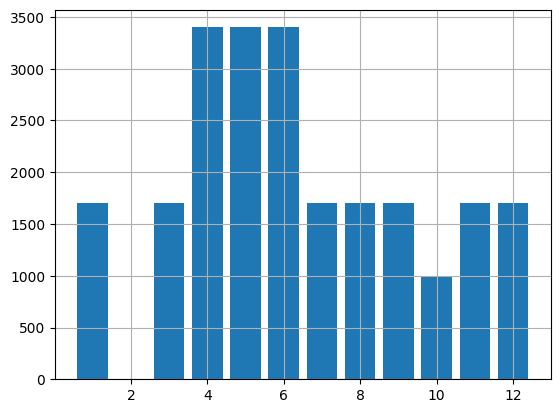

In [209]:
plt.bar(df['Month'],df['sales'])
plt.grid()
